In [1]:
import control

In [2]:
import numpy as np

In [14]:
num = np.array([0.01781, 0.01585], dtype= float)
den = np.array([1, -1.679, 0.7047])
dt = 0.1

gz= control.TransferFunction(num, den, dt)
gz

TransferFunction(array([0.01781, 0.01585]), array([ 1.    , -1.679 ,  0.7047]), 0.1)

In [4]:
yout, T = control.step_response(gz)

In [5]:
import matplotlib.pyplot as plt

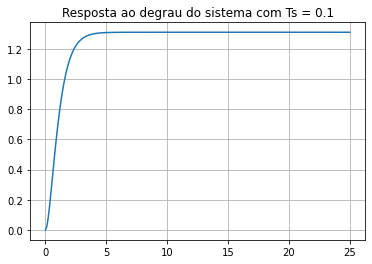

In [19]:
plt.title("Resposta ao degrau do sistema com Ts = "+ str(dt) )
plt.grid()
plt.plot(yout, T)

In [6]:
control.poles(gz)

array([0.84726209+0.j, 0.83173791+0.j])

In [7]:
import sympy

In [9]:
import scipy
from scipy import signal

In [34]:
num2 = np.array([0.01781, 0.01585])
den2 = np.array([1, -2.679, 2.3837, -0.7047])
dt = 0.1

gz2= control.TransferFunction(num2, den2, dt)
gz2

TransferFunction(array([0.01781, 0.01585]), array([ 1.    , -2.679 ,  2.3837, -0.7047]), 0.1)

In [35]:
signal.residue(num2, den2)

(array([ 11.73879239, -13.04852002,   1.30972763]),
 array([0.83173791, 0.84726209, 1.        ]),
 array([], dtype=float64))

In [36]:
res = signal.residue(num2, den2)

In [44]:
res[0][0]

11.738792391127454

In [21]:
from sympy import Symbol
k = Symbol('k')

In [45]:
yk = res[0][1]*(res[1][1])**k + res[0][2]*(res[1][2])**k + res[0][0]*(res[1][0])**k
yk

11.7387923911275*0.831737912651683**k - 13.0485200175886*0.847262087348341**k + 1.30972762645989*0.999999999999974**k

In [50]:
T = np.arange(0, 100, 0.01)

In [52]:
resultados = []
for t in T:
    yk = res[0][1]*(res[1][1])**t + res[0][2] + res[0][0]*(res[1][0])**t
    resultados.append(yk)

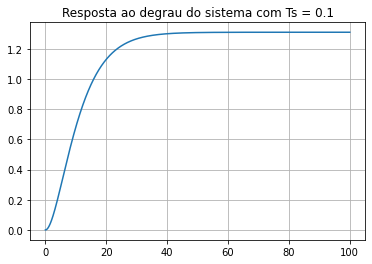

In [53]:
plt.title("Resposta ao degrau do sistema com Ts = "+ str(dt) )
plt.grid()
plt.plot(T, resultados)